## Luke Traverso
## Professor Binowski
## 10.8.24
### Answer the questions  from Part 1
### Get all the data from the now renamed columns

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
survey = pd.read_csv('cleansurveytrue.csv')

In [76]:
survey

,course_enrolled,source_ccm_website,source_socialmedia,source_communityevent,source_family_friend,source_currentccm_student,source_ccm_alumni,source_hs_teacher,source_hs_counselor,source_in-app_ad,...,info_employer,info_ccm_workforce_dev,info_nj_workforce_dev,info_other,"Was a computing major/certificate your first choice, or did you change majors from a different CCM program? If you changed majors, indicate what your first major was.","On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you in taking more computing classes?",Please explain your answer to the question above. Why or why not would you be interested in taking another computing class?,gender,race_ethnicity,Age
0,CMP 128 Computer Science I,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,...,NaN,NaN,NaN,NaN,NaN,2.0,Quite difficult and I do not see myself using ...,Man,White/Caucasian,21-24
1,NaN,No,No,Yes,No,No,No,Yes,Don't recall,No,...,No,No,No,Don't recall,First Choice,NaN,NaN,Man,Hispanic or Latino;White/Caucasian;Multi-Racial,18 and younger
2,CMP 128 Computer Science I,No,No,No,Yes,No,Yes,No,Yes,No,...,No,No,No,No,First Choice,NaN,NaN,Man,Hispanic or Latino;Asian,18 and younger
3,CMP 128 Computer Science I,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,...,NaN,NaN,NaN,NaN,NaN,3.0,It all depends on what classes are required fo...,Man,Hispanic/Latino,19-20
4,CMP 128 Computer Science I,No,No,No,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,First Choice,NaN,NaN,Man,Asian,19-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,CMP 128 Computer Science I,Don't recall,Don't recall,Don't recall,Don't recall,Yes,Don't recall,Don't recall,Don't recall,Don't recall,...,No,No,No,No,First Choice,NaN,NaN,Man,Black/African American,19-20
193,CMP 128 Computer Science I,Yes,No,No,Yes,No,No,No,Yes,No,...,Don't recall,Don't recall,Don't recall,Don't recall,Science,NaN,NaN,Man,Hispanic or Latino;Black/African American,19-20
194,CMP 128 Computer Science I,Yes,Don't recall,No,No,No,No,Yes,Yes,No,...,No,No,No,No,Business,NaN,NaN,Man,Hispanic/Latino,19-20
195,CMP 128 Computer Science I,Yes,No,No,Yes,Yes,Yes,Yes,No,No,...,Don't recall,Don't recall,Don't recall,Don't recall,Engineering,NaN,NaN,Man,Hispanic or Latino;American Indian/Native Amer...,19-20


In [ ]:
survey.columns

#### I am looking to answer all of these questions:

#### How many people have already participated in CCM tech events in the past? 

#### Which programs had the highest impact on peoples decision to enroll in a CCM computing course? 

#### What is the main goal of people seeking a computing goal/certificate at CCM?

#### Is a computing major a typical first choice for students or do many people switch into it?

#### Look at the records of just the Non-Computing Majors taking Computing Major classes. This group includes: Challenger, ShareTime, Non-Degree Seeking, Undecided and all those who selected Other.  What is the interest level for taking another computing class? Show a bar chart with the count for each interest level.


In [78]:
#Look thru the columns that will be involved in the questions that will be answered.
participation_columns = [col for col in survey.columns if 'participation' in col]
impact_columns = [col for col in survey.columns if 'impact' in col]
motivation_columns = [col for col in survey.columns if 'motivation' in col]

In [80]:
#Count of people who participated in any CCM tech event
participated_in_event = survey[participation_columns].notna().any(axis=1).sum() #look for the sum of the non-na results in the event participation columns
print("People who participated in a CCM tech event:", participated_in_event)

#Count the impact of each program on decision to enroll
impact_counts = survey[impact_columns].notna().sum().sort_values(ascending=False) 
print("Top impact programs on decision to enroll:\n", impact_counts)

#Count main motivations for seeking a computing degree/certificate
motivation_counts = survey[motivation_columns].notna().sum().sort_values(ascending=False)
print("Main goals for seeking a computing goal/certificate:\n", motivation_counts)

# Analyze first choice vs switched majors
first_choice_counts = survey['Was a computing major/certificate your first choice, or did you change majors from a different CCM program? If you changed majors, indicate what your first major was.'].value_counts()
print("First choice vs switched majors:\n", first_choice_counts)



People who participated in a CCM tech event: 197
Top impact programs on decision to enroll:
 impact_cost                       192
impact_location                   192
impact_program_choice             192
impact_reputation                 186
impact_transfer_ccm_credits       185
impact_online_offerings           184
impact_class_size                 183
impact_family_friend              182
impact_fin_aid                    180
impact_hs_computing_class         180
impact_family_friend_influence    178
impact_faculty_staff              177
impact_scholarships               177
impact_extracurricular            176
impact_family_computing_field     170
impact_work_experience            168
impact_hs_computing_club          167
impact_computing_competition      167
impact_hs_teacher_counselor       166
impact_ap_computing               165
impact_employer_influence         164
impact_current_student            164
impact_dual_enrollment            164
impact_hs_college_credit         

In [ ]:
top_5_reasons = first_choice_counts.sort_values(ascending=False).head(5)
plt.barh(top_5_reasons.index, top_5_reasons.values, color='blue')
plt.xlabel('Count')
plt.ylabel('Reasons')
plt.title('Top 5 Reasons for Choosing or Switching to a Computing Major')
plt.show()

In [ ]:
#Count the number of "Yes" responses for each event
participation_counts = {}
for col in participation_columns:
    participation_counts[col] = (survey[col] == 'Yes').sum() #sort thru every participation column and look for the answer 'yes'

# Convert the dictionary to a Series for easier plotting
participation_counts_series = pd.Series(participation_counts).sort_values(ascending=False)
#By converting it into a series, the data will be sorted by count, which then makes it easier to find the top tech events

# Step 3: Plot the counts for each event
plt.figure(figsize=(10, 6))
participation_counts_series.plot(kind='bar', color='skyblue')
plt.xlabel('CCM Held Tech Events')
plt.ylabel('Total Count for The Event')
plt.title('Participation Count for Each CCM Tech Event')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.tight_layout()
plt.show()

In [ ]:
# Step 2: Count the number of "Yes" responses for each motivation
motivation_counts = {}
for col in motivation_columns:
    motivation_counts[col] = (survey[col] == 'Yes').sum() #same as last question, looked for each yes in the motivation column and accumulated them to gather the count

# Convert the dictionary to a Series and sort by count in descending order
motivation_counts_series = pd.Series(motivation_counts).sort_values(ascending=False)

#Get the top 5 motivations and group the rest as "Other"
top_5_motivations = motivation_counts_series.head(5)
other_count = motivation_counts_series.iloc[5:].sum()  # Sum of all motivations not in the top 5

#Add "Other" category to the top 5 motivations, accounts for 
top_5_motivations['Other'] = other_count

#Plot as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_motivations, labels=top_5_motivations.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Main Goals for Seeking a Computing Goal/Certificate')
plt.show()

#needed a good bit of help from chatGPT on this one, I didn't want to only do counts so I tried something other than a bar chart and attempting to display the percentages.

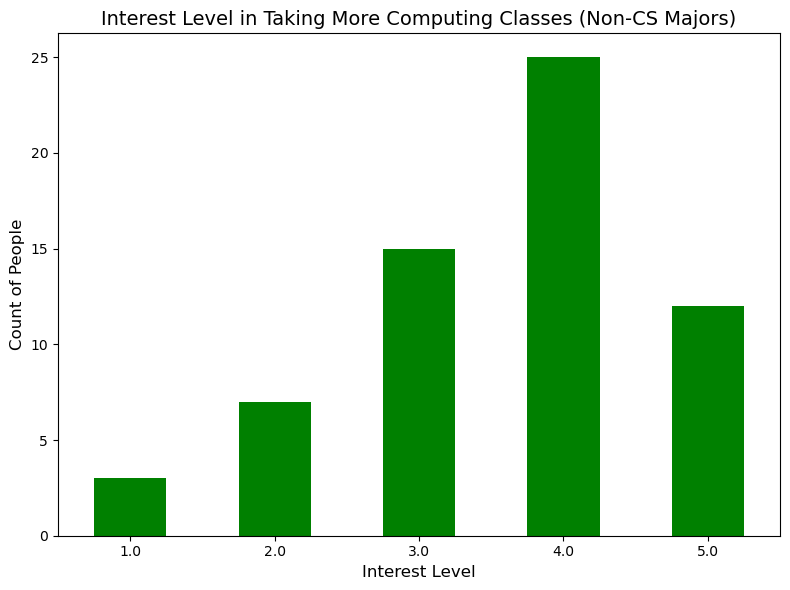

In [90]:
# Step 1: Rename columns with shorter, cleaner names
survey.rename(columns={
    'Was a computing major/certificate your first choice, or did you change majors from a different CCM program? If you changed majors, indicate what your first major was.': 'compute_major_choice',
    'On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you in taking more computing classes?': 'interest_level'
}, inplace=True)

#Filter the data to exclude computing majors
non_compute_major = survey[survey['compute_major_choice'] != 'First Choice'] #When the persons first choice is not a computing major= non computing major

#Count the interest levels
interest_counts = non_compute_major['interest_level'].value_counts().sort_index() 

#Plot the bar chart
plt.figure(figsize=(8, 6))
interest_counts.plot(kind='bar', color='green')
plt.title('Interest Level in Taking More Computing Classes (Non-CS Majors)', fontsize=14)
plt.xlabel('Interest Level', fontsize=12)
plt.ylabel('Count of People', fontsize=12)
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal
plt.tight_layout()
plt.show()


In [92]:
plt.savefig('interest_level_plot.png')

<Figure size 640x480 with 0 Axes>

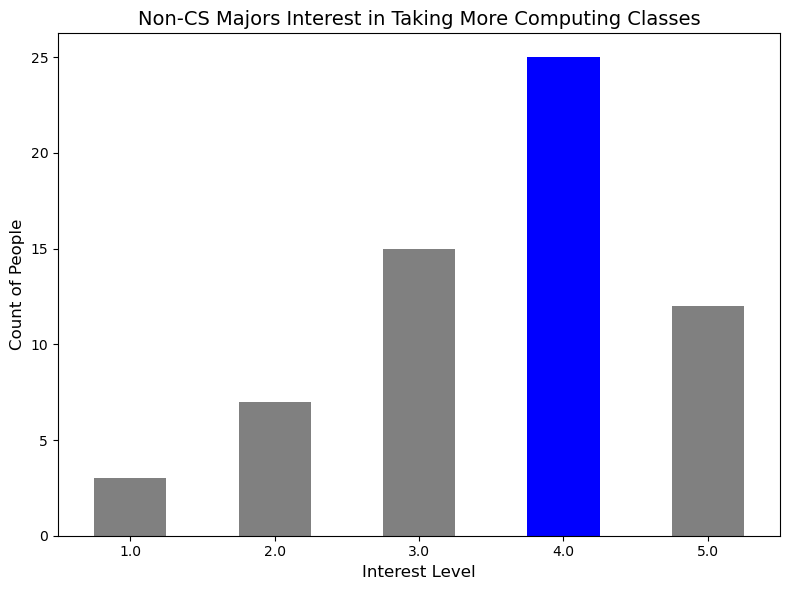

In [98]:
top_index = interest_counts.sort_values(ascending=False).index[0] #Look for the top/most common result
colors = ['grey' if i != top_index else 'blue' for i in interest_counts.index]

plt.figure(figsize=(8, 6))
interest_counts.plot(kind='bar', color=colors)
plt.title('Non-CS Majors Interest in Taking More Computing Classes', fontsize=14)
plt.xlabel('Interest Level', fontsize=12)
plt.ylabel('Count of People', fontsize=12)
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal
plt.tight_layout()
plt.show()